# Fitting models to Data

Please ensure you have watched the Chapter 8 video(s).

## You will learn the following things in this Chapter

- Analytic expressions of fitting a straight line to data: linear regression.
- Understand how errors need to be accounted for.
- How to use Python functions to fit curves or non linear data.
- How to evaluate the goodness of your fit.
- Be able to use an MCMC to fit data with a model.
- Understand how bootstrapping can give us sampling statistics.
- How to use Python programming to do the above.
- After completing this notebook you will be able to finish CA2.

***

# Explaining our data with models

Here we will review one of the most important aspects of day-to-day data science - given data and a model, what the values for the parameters in that model. In other words, **parameter estimation**, one of the most important goals of data science.

## Fitting straight line models to data - linear regression

Probably one of the most common things scientists do, is fit a straight line to data. To do this we want to express the fit as a linear relation in the form of $y = A + Bx$ where $A$ is the y-intercept and $B$ is the gradient ie the true value of $y_i$ is given by $y_i = A+Bx_i$. However we have to be careful with regards to errors in $y$ or $x$.

Normally what happens is that the experimenters make a scatter plot of $x$ and $y$, and notice that there's some sort of linear-looking relationship, and decide it would be good to have a mathematical form for this relationship, and so try to fit a straight line. They may even have calculated the covariance or correlation statistics from a data set, and realised that two of the variables have a strong correlation. How do we determine the best fit line to find the values of A and B parameters that describe our data and give us the “true y”?  

### Derivation: y=A+Bx parameters

Once again, we are going to look towards the principle of maximum likelihood for help. If we knew what $A$ and $B$ were, we could, for a given value of $x_i$, compute the corresponding value of $y_i$,

$\text{true value for}y_i=A+Bx_i$.

The measured values of $y_i$ are therefore drawn from a normal distribution of width $\sigma_y$ that is centred on the true value $y_i$. So we can write the probability of obtaining any given measurement $y_i$ as,

$p_{A,B}(y_i)\propto \dfrac{1}{\sigma_y}e^{-(y_i-A-Bx_i)^2/2\sigma_y^2}.$

The subscripts $A$ and $B$ indicate that this probability depends on the unknown values of $A$ and $B$.

Taking this a stage further, we can now write the probability of obtaining our entire set of measurements as

$p_{A,B}(y_1,y_2,\ldots,y_N)=p_{A, B}(y_1)\dotsb p_{A,B}(y_N)$
$p_{A,B}(y_1,y_2,\ldots,y_N)\propto \frac{1}{\sigma_y^N}e^{-\chi^2/2}$

where $\chi^2$ is our old friend from Chapter 5,

$\chi^2=\sum_{i=1}^{N}\dfrac{(y_i-A-Bx_i)^2}{\sigma_y^2}.$

As before, we are interested in recovering the values of $A$ and $B$ that maximise the probability of obtaining the set of the observed measurements, $(x_i,y_i)$. The joint probability of the measurements is obtained when $\chi^2$ is a minimum, so we need to differentiate with respect to our unknowns $A$ and $B$, and set the differentials equal to zero, as we did before:

$\dfrac{\partial \chi^2}{\partial A}=\dfrac{-2}{\sigma_y^2}\sum_{i=1}^N (y_i-A-Bx_i)=0$


$\dfrac{\partial \chi^2}{\partial B}=\dfrac{-2}{\sigma_y^2}\sum_{i=1}^N x_i(y_i-A- Bx_i)=0.$

This results in a pair of simultaneous equations for  $A$ and $B$,

$AN+B\sum x_i=\sum y_i$,

and

$A\sum x_i+B\sum x_i^2=\sum x_i y_i$,

where we have dropped the limits on the sumation for sake of clarity.

These equations can then be solved for $A$ and $B$ to get,

$A=\dfrac{\sum x^2\sum y-\sum x\sum xy}{N\sum x^2-(\sum x)^2}$


$B=\dfrac{N\sum xy-\sum x\sum y}{N\sum x^2-(\sum x)^2}.$

Together, these equations allow us to calculate the best fit to the line $y=A+Bx$. The resulting line called the least squares fit, or line of regression of $y$ on $x$. Now that we have $A$ and $B$, we naturally want to estimate the uncertainties in these values. But first we need to discuss the uncertainty in $y$.

### Errors

#### Errors in y - constant error

In the analysis above, we assumed that the values of $y_i$ were distributed around the true values with spread of $\sigma_y$. You will notice however, that our estimates of $A$ and $B$ do not actually depend on this number (or numbers, in the case where $\sigma_y$ is different for each point). However the true values of $y_i$ are predicted  by the line which $A$ and $B$ describe, and so the deviations of our measured values $y_i$ should be depend on $A$ and $B$. This immediately suggests that a good way to estimate $\sigma_y$ is from

$\sigma_y =\sqrt{\dfrac{1}{N}\sum_{i = 1}^N(y_i-A-Bx_i)^2}$


which is the usual root-mean-square deviation from the mean, where in this case, the mean is defined by the best estimate of the line we have just fitted (i.e. the values $A$ and $B$).  However, the equations above have a problem, it violates the degrees of freedom condition. Since both $A$ and $B$ have been defined from the data already, we need to replace the $\dfrac{1}{N}$ with $\dfrac{1}{N -2}$ to get,

$\sigma_y=\sqrt{\dfrac{1}{N-2}\sum_{i=1}^N(y_i-A-Bx_i)^2}$.

This makes sense: if you have only two data points, then the best guess for the line will have $A$ and $B$ such that the line goes exactly through both points - there is no scatter! As soon as we have 3 data points, then at least 1 will not sit on the line, and the idea of $\sigma_y$ becomes meaningful.

How does this propogate into the uncertainty in $A$ and $B$? Note that both $A$ and $B$ are well-defined functions of $y_i$. This means that we can use the standard error propagation formula that we encountered Chapter 5. Using this, we get,

$\sigma_A=\sigma_y\sqrt{\dfrac{\sum x^2}{N\sum x^2-(\sum x)^2}}$

and

$\sigma_B=\sigma_y\sqrt{\dfrac{N}{N\sum x^2-(\sum x)^2}}$.

These kind of errors are known as homoscedastic errors.

#### Errors in both x and y

What if there are uncertainties on both $x$ and $y$? For the special case of straight line, the uncertainties in both $x$ and $y$ make very little difference. To see this imagine that there is no error in $y$, but $x$ has an error of $\delta x$. This point lies off the line, at a distance $\delta y$ so that ultimately it produces an equivalent error in $y$. For the case of a straight line, the relationship is,

$\delta y(\text{equiv})=\dfrac{dy}{dx}\delta x.$

The standard deviation $\sigma_x$ is the root-mean-square value of $ \delta x$ that would result from repeating this measurement for each of our points, and so,

$\sigma_y(\text{equiv})=\dfrac{dy}{dx}\sigma_x.$

This is true for any function that has no second derivative, but in the special case of a straight line, $\dfrac{dy}{dx}$ is simply our fit parameter, $B$. Thus the problem of fitting a line with uncertainties in $x$ but none in $y$ is the same as the problem of fitting a line with uncertainties in $y$ but none in $x$.

In the case where there are uncertainties in both $x$ and $y$, we simply translate the $\sigma_x$ to $\sigma_y$. Accounting for the intrinsic errors in $y$, this yields,

$\sigma_y(\text{equiv})=\sqrt{\sigma_y^2+(B \sigma_x)^2}$

where we have combined the errors in quadrature in the usual way. Clearly, if we are not interested in fitting a straight line, then this expression may be more complicated.

#### Heteroscedastic errors 

What about the case in which the errors on $y_i$ are not constant? (These are called heteroscedastic errors.) In this case we need to use the idea of **weighted least squares** (see Chapter 5). By carrying the weights $w_i = 1/\sigma_i^2$ (these are on $y_i$) through the analysis, one ends up with the following expressions,

Weight the probabilities by the errors where $w = 1/\sigma^2$

$A = \dfrac{\sum wx^2 \sum wy - \sum wx \sum wxy }{\sum w \sum wx^2 - (\sum wx)^2}$

$B = \dfrac{\sum w \sum wxy - \sum wx \sum wy }{\sum w \sum wx^2 - (\sum wx)^2}$.

The associated uncertainties are,

$\sigma_A =  \sqrt{ \dfrac{\sum wx^2}{  \sum w \sum wx^2 - (\sum wx)^2} }$

and

$\sigma_B =  \sqrt{ \dfrac{\sum w} {  \sum w \sum wx^2 - (\sum wx)^2} }$.


We basically see that every term in the homoscedastic errors has an extra $w$ and $N$ is replaced by $\sum w$.  Just like a weighted average, points contribute to the end sum where less weight is given to the
less precise measurements and more weight given to more precise measurements. This approach assumes that $w$ is the exact weight which it is not (worse if derived from small samples) and this approach can still be sensitive to outliers.   The concept of weighting can be used in both linear and non linear fitting, though the expressions above are only for the linear case.

### <font color=#4290C4>Example</font>

Netflix managers poll their subscribers to see how the fraction of users that watched She-Ra in October 2019 $x$ compares with the age of the viewer $y$ before they decide to commission a new series of the show. This data is available [here](https://github.com/haleygomez/Data-Science-2025/raw/main/blended_exercises/Chapter8/DataScience_datafile_1.dat), url: https://github.com/haleygomez/Data-Science-2025/raw/main/blended_exercises/Chapter8/DataScience_datafile_1.dat. 

1. Write functions from scratch to fit a straight line to the data quoting all the fit parameters and their errors.  

2. Comment on the uncertainties.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

This questions involves fitting a straight line to set of points with homoscedastic errors on $y$. 

Since the errors are homoscedastic, the scatter around the line should be notably larger than the $\sigma = 1.6$ that one might expect. 

Let's open the datafile and take a look.

--2025-09-12 14:55:50--  https://github.com/haleygomez/Data-Science-2025/raw/main/blended_exercises/Chapter8/DataScience_datafile_1.dat
Resolving github.com (github.com)... 20.26.156.215
Connecting to github.com (github.com)|20.26.156.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/haleygomez/Data-Science-2025/main/blended_exercises/Chapter8/DataScience_datafile_1.dat [following]
--2025-09-12 14:55:50--  https://raw.githubusercontent.com/haleygomez/Data-Science-2025/main/blended_exercises/Chapter8/DataScience_datafile_1.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2314 (2.3K) [text/plain]
Saving to: 'data_mcmc.dat'

data_mcmc.dat       100%[===================>]   2.2

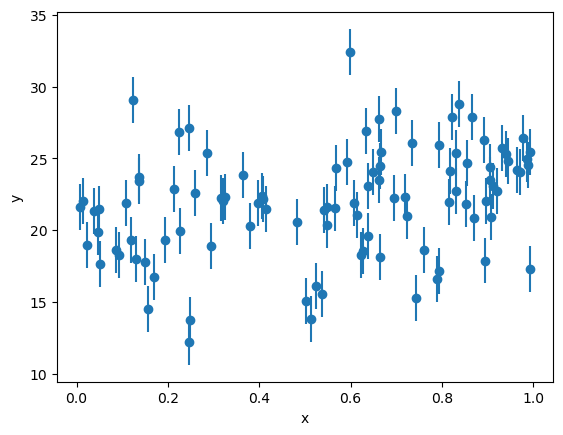

In [2]:

!wget -O data_mcmc.dat "https://github.com/haleygomez/Data-Science-2025/raw/main/blended_exercises/Chapter8/DataScience_datafile_1.dat"

import numpy as np
data = np.genfromtxt('data_mcmc.dat',names=True)

# print out the columns to see what's in the file
print(data.dtype.names)

import numpy as np
import pylab as plt 

%matplotlib inline  

#data = np.genfromtxt('data_chapter8.dat',names=True)

plt.errorbar(data['x'],data['y'],yerr=data['sigma_y_estimate'],fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The scatter in the data is clearly much larger than the errors in $y$ quoted!  Note though, to orthogonalise the model we need to either use the above equations and **quote the covariance** or use:

$y = A+B(x_i-\hat{x})$

throughout, where $\hat{x}$ is the mean.  Here we will show the 1st option.

The errors are homoscedastic since the errors on y are all the same.

In [3]:
# functions to estimate A and B based on notes and equations above
def best_fit_a(x,y,N):
    result = (np.sum(x**2.)*np.sum(y) - np.sum(x)*np.sum(x*y))/ ((N*np.sum(x**2.)) - (np.sum(x))**2. )
    return result

def best_fit_b(x,y,N):
    result = ((N*np.sum(x*y))- (np.sum(x)*np.sum(y))) / ((N*np.sum(x**2.)) - (np.sum(x))**2. )
    return result

A = best_fit_a(data['x'],data['y'],len(data['x']))
B = best_fit_b(data['x'],data['y'],len(data['x']))

print('Best fit line equation paramaters: A = {:.2f} age in years'.format(A),'and B= {:.2f} age in years/fraction'.format(B))

Best fit line equation paramaters: A = 19.76 age in years and B= 3.97 age in years/fraction


Text(0, 0.5, 'y')

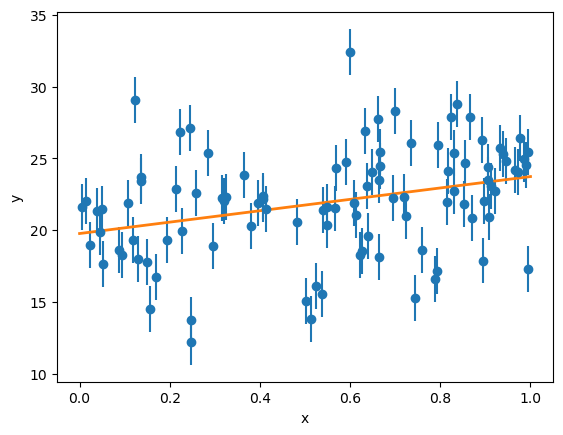

In [4]:
# to plot the straightline
def straightline(a,b,x):
    result = a + b*(x)
    return result

x = np.linspace(0,1,100)
fit = straightline(A,B,x)

plt.errorbar(data['x'],data['y'],yerr=data['sigma_y_estimate'],fmt='o')
plt.plot(x,fit,lw=2)
plt.xlabel('x')
plt.ylabel('y')

For errors in $A$ and $B$ we need to use the standard deviation of the $y$ data:

$\sigma_y = \sqrt{ \dfrac{1}{N} \sum^N_{i-1} (y_i - A-Bx_i)^2 }$

where here $N$ is the *number of degrees of freedom* ie in this case $N={\rm number~of~data~ points}-2$. The $N-2$ appears because we already need to know $A$ and $B$ to work out $\sigma_y$.

We need to do this because the errors on the fit depends not just on the error bars in $y$ but also on the fit itself, and by using the above equation we can estimate the true error in $y$ (which should be larger than then 1.6 errors given to the students for each datapoint).  

In [5]:
# let's estimate sigma_y using our A+B values

def sigma(N,A,B,x,y):
    sigma = np.sqrt( (1./(N-2))* np.sum((y - A - B*x)**2.0)  )
    return sigma

N=len(data['x'])
x= data['x']
y= data['y']

sigma_y = sigma(N,A,B,x,y)

print('The error in y (sigma_y) from our best fit line is {:.2f}.'.format(sigma_y))

The error in y (sigma_y) from our best fit line is 3.61.


Thus the $\sigma_y$ of the data is much larger than the 1.6 on each data point quoted in the original data file. 

Calculating $\sigma_A$ and $\sigma_B$:

In [6]:
def error_in_a(x,sig_y,N):
    result = sig_y* np.sqrt( np.sum(x**2.) / ((N*np.sum(x**2.)) - (np.sum(x))**2.  )  )
    return result

def error_in_b(x,sig_y,N):
    result = sig_y* np.sqrt( N / ((N*np.sum(x**2.)) - (np.sum(x))**2.  )  )
    return result

error_A = error_in_a(data['x'],sigma_y,len(data['x']))
error_B = error_in_b(data['x'],sigma_y,len(data['x']))

print('A is {:.2f} age in years'.format(A),'with error {:.2f}'.format(error_A))
print('B is {:.2f} age in years/per fraction'.format(B),'with error {:.2f}'.format(error_B))

A is 19.76 age in years with error 0.75
B is 3.97 age in years/per fraction with error 1.19


So this is not a good fit if we take the error in $y$ from the original data, but the fit vs model is better when accounting for the larger error in $y$ compared to the true fit $\sigma_y$. But this is simply because the error is so large the model can be seen as an ok fit

One can also try the Spearman rank correlation to see if a straight line fit is appropriate:

In [7]:
from scipy.stats import rankdata
# let's rank the data
r_x = rankdata(data['x'])
r_y = rankdata(data['y'])

# need to set up equation in notes
def rho_s(rank_x,rank_y,N):
    top = np.sum(rank_x*rank_y) - (N*(N+1)**2./4)
    bottom_1 = np.sqrt( np.sum(rank_x**2.) - (N*(N+1)**2./4)   )  
    bottom_2 = np.sqrt( np.sum(rank_y**2.) - (N*(N+1)**2./4)   )
    rho = top / (bottom_1*bottom_2)
    return rho

spearman = rho_s(r_x,r_y,len(data['x']))

print('the Spearman rank statistic is {:.2f}'.format(spearman))

the Spearman rank statistic is 0.37


Thus a linear relationship between the two does not make a good model for this data since the Spearman rank statistic is less than 0.6.   As the model chosen to fit the data is flawed the error on the fit parameters found from the equations above are in fact too small and does not accurately reflect the uncertainty in the $A$ and $B$ values given the quality of the fit. 

We did all of the above by hand to make sure we could work through the mathematics, but we can also simply use Python to make things easier and quicker.  For example, we could fit a straight line using the functions `poly1d` or `curve_fit`. 

Fit parameters A and B are 19.764 and 3.967

covariance matrix [[ 0.10966227 -0.15270869]
 [-0.15270869  0.27741274]]


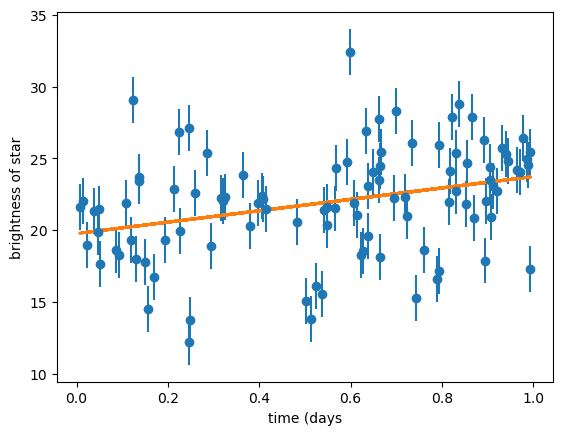

In [8]:
from scipy import optimize 

# this is a function that we think may explain the data
def straightline_func(x,a,b):
    return a + b*x

data['x'],data['y']

params, params_covariance = optimize.curve_fit(straightline_func, data['x'],data['y'],\
                                               sigma=data['sigma_y_estimate'],absolute_sigma=True)

print('Fit parameters A and B are {:.3f} and {:.3f}'.format(params[0],params[1]))
print()
print('covariance matrix',params_covariance)

# plot the data
plt.errorbar(data['x'],data['y'],yerr=data['sigma_y_estimate'],fmt='o',label='data')
plt.xlabel('time (days')
plt.ylabel('brightness of star')

# plot the fit
plt.plot(data['x'],straightline_func(data['x'],params[0],params[1]),lw=2,label='best fit')

In [9]:
# by hand
print('Best fit line equation paramaters by hand: A = {:.2f} age in years'.format(A),\
          'and B= {:.2f} age in years/fraction'.format(B))

# using Python's curve fit

print('Best fit line equation paramaters using functions: A = {:.2f} age in years'.format(params[0]),'and B= {:.2f} age in years/fraction'.format(params[1]))

Best fit line equation paramaters by hand: A = 19.76 age in years and B= 3.97 age in years/fraction
Best fit line equation paramaters using functions: A = 19.76 age in years and B= 3.97 age in years/fraction


### How Good a Fit is Our Model?

#### Residuals

Let's take the Netflix data above and take a look at how *different* our model predictions are (in this case our straight line with $A$ and $B$) compared with the original data  - this difference is called the *residual*.

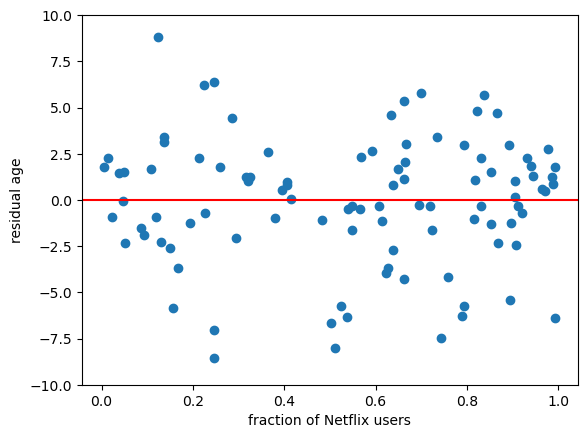

In [10]:
# residual = difference between data and model
residual = data['y'] - straightline(A,B,data['x'])

plt.scatter(data['x'],residual)

plt.ylim(-10,10)
plt.ylabel('residual age')
plt.xlabel('fraction of Netflix users')
plt.axhline(0,c='red')

We can see just by looking at the residuals between the data and what would be predicted by our model, that there is a lot of scatter above and below the zero line (which is what we would get if our model matched our data perfectly). The scatter does not appear randomly distributed either.

#### Reduced chi-square test

Looking at the plots we've made above, the straight line does not look like a good fit to the huge scatter around the data - indeed the straight line does not even pass though many of the error bars on the data points.  This suggests that either there are unaccounted sources of error or that the data is poorly modelled with a straight-line.  We can quantify whether our fit is good by using the information provided by the residuals and estimating the chi-square statistic (Chapter 5).

The reduced chi-square test to evaluate the goodness of fit is given by

$\bar{\chi}^2 = \dfrac{ \chi^2 }{ N_d}$

where $N_d$ is the number of degrees of freedom = $N_{\rm data} - N_{\rm params}$. 

Looking at the plots we've made above, the straight line does not look like a good fit to the huge scatter around the data - indeed the straight line does not even pass though many of the error bars on the data points.  This suggests that either there are unaccounted sources of error or that the data is poorly modelled with a straight-line. 

If the model describes the data and we have a good estimate of the uncertainty of each data point, then the reduced chi-square value would be approximately equal to one. 

There might be fluctuation around one due to random variations about the mean value, so we should use an additional criteria to decide whether to reject the null hyopthesis (that the model describes the data and any deviations are explained due to random variation).  Given that the mean of a chi-square distribution is $\chi_{\rm mean}^2 = N_d$ and the variance is $2 N_d$:

$N_d \pm 2\sqrt{2N_d} \le \chi^2_{\rm mean} \le N_d \pm 2\sqrt{2N_d}$,

ie is your value for $\chi^2$ within $\pm 2\sigma$ of the mean? 

#### Confidence intervals on the chi-square statistic

We can also estimate confidence limits for chi-square parameters. The  region of confidence (significance level $\alpha$) is defined by

$\chi_{\alpha}^2 = \chi_{\rm min}^2 + \Delta$

The following table shows the value of $\Delta$ (difference above value of $\chi^2$) for N fit parameters for a given confidence interval (1, 2 and 3 $\sigma$).

| probability  |  N=1   | N=2 | N=3 |
|--------------|--------| ----| ----| 
| 0.680 | 1.00| 2.30 | 3.53 |
|0.954 | 4.00| 6.17 | 8.02|
|0.997 | 9.00 | 11.8 | 14.20 |

### <font color=#4290C4>Example</font>

In the question above, we fit the Netflix data with a straight line.  Derive a measure of the goodness of fit of this model. 

$N_{\rm data} - N_{\rm params}$ is $100-2$ since we need $A$ and $B$ (which are not independent) and $\sigma_y$ to determine $\chi^2$. We would expect reduced $\chi^2$ to equal close to 1 to denote a good fit.

In [11]:
def eqn(a,b,z):
    return a + b*z

def chi_sq(y,x,sig_y,a,b):
    result = np.sum(  (y - a-b*data['x'])**2. /sig_y**2. )
    return result

sig_y = 1.6 # quoted as error in the data
N_d = len(data['x']) - 2 # degrees of freedom: need to calculate A+B + sigma
chi_sq = chi_sq(data['y'],data['x'],sig_y,A,B)

red_chi_sq  = chi_sq / N_d 
err_red_chi_sq = np.sqrt(2./len(data['x']))

print('chi-square is {:.3f} +/- {:.3f}'.\
      format(chi_sq,np.sqrt(2*N_d)))

print()
print('reduced chi-square is {:.3f} +/- {:.3f}'.\
      format(red_chi_sq,np.sqrt(2/err_red_chi_sq)))

# check if it's within 2sigma of the mean value of chi
chi_sq_mean = N_d
print()
print('chi-square mean is {:.3f}'.\
      format(chi_sq_mean))

crit = 2*np.sqrt(2*N_d)

print()
print('chi-square mean +/- 2sigma is {:.3f} +{:.3f} -{:.3f}'.\
      format((chi_sq_mean),(chi_sq_mean+crit),(chi_sq_mean-crit)))

chi-square is 497.621 +/- 14.000

reduced chi-square is 5.078 +/- 3.761

chi-square mean is 98.000

chi-square mean +/- 2sigma is 98.000 +126.000 -70.000


Therefore this qualitively proves that our straight line model is not a good fit, as the chi-square statistic we calculated is *not* within 2$\sigma$ of the mean. 

### Monte Carlo Model fitting

Suppose we have good reason to think that nature generates values of some physical quantity  $y$  in a way that depends on some other physical quantity  $x$, in the manner of some model, let's say: $y(x)=Ax+B$.  We would like to find out the values $y$ and ranges of $A$ and $B$ by taking a number of measurements of $y(x)$ to trace the relationship. Suppose also that there is some uncertainty in each of the measurements. 

To explore how our measurements might behave, we can simulate a large number of hypothetical experiments by using Monte Carlo methods and assess the range of parameters returned from these simulated or "fake" experiments.

We can approach this by simulating how much each measured $y_i$ we've generated, deviates from the "true" value $g_i$ which our model (in the example above, the straight line) predicts.

### <font color=#4290C4>Example</font>

Use the Monte Carlo method to generate random data from the Netflix data in DataScience_datafile1.dat, and derive new (straight line) fit parameters $A$ and $B$ from this.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

Best fit line from earlier: A = 19.76 age in years and B= 3.97 age in years/fraction
Best fit line from MC: A = 19.76 age in years and B= 3.98 age in years/fraction


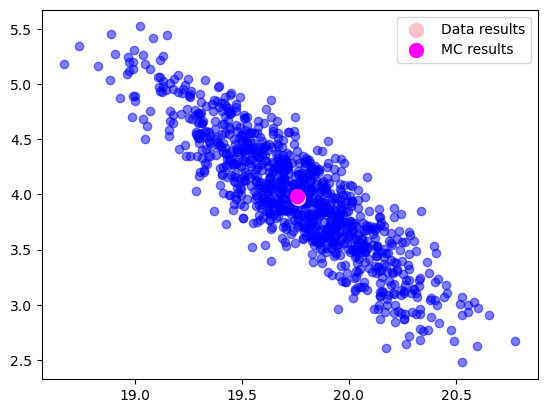

In [12]:
%matplotlib inline

# generate n sets of data from the datafile by adding gaussian noise within error
n_sample = 1000 
n = len(data['x'])

new_y =np.zeros([n,n_sample])
new_x =np.zeros([n,n_sample])

for i in range(n_sample):
    new_y[:,i] = np.random.normal(data['y'],data['sigma_y_estimate']) 
    new_x[:,i] =  data['x']
    
A_mc = np.zeros(n_sample)
B_mc = np.zeros(n_sample)

# fit a line to each set of data
for j in range(n_sample):
    A_mc[j] = best_fit_a(new_x[:,j],new_y[:,j],n)
    B_mc[j] = best_fit_b(new_x[:,j],new_y[:,j],n)  

# get average values of A and B from all the samples
mean_A_mc = np.mean(A_mc)
mean_B_mc = np.mean(B_mc)

print('Best fit line from earlier: A = {:.2f} age in years'.format(A),\
          'and B= {:.2f} age in years/fraction'.format(B))
print('Best fit line from MC: A = {:.2f} age in years'.format(mean_A_mc),\
          'and B= {:.2f} age in years/fraction'.format(mean_B_mc))

plt.scatter(A_mc,B_mc,marker='o',c='blue',alpha=0.5)
plt.scatter(A,B,c='pink',label = 'Data results',s=100)
plt.scatter(mean_A_mc,mean_B_mc,c='magenta',label = 'MC results',s=100)
plt.legend()

The best fit values from the straight line fit to the original data and the straight line fit to the MC data are rather similar.   But the great thing about the MC is that we can use the standard deviation to derive an uncertainty in $A$ and $B$.



In [13]:
mean_A_mc_err = np.std(A_mc,ddof=1)
mean_B_mc_err = np.std(A_mc,ddof=1)

print('Best fit line equation paramaters from original data: A = {:.2f} +/- {:.2f} age in years'.format(A,error_A),\
          'and B= {:.2f} +/- {:.2f} age in years/fraction'.format(B,error_B))
print()
print()
print('Best fit line equation paramaters from MC: A = {:.2f} +/- {:.2f} age in years'.format(mean_A_mc,mean_A_mc_err),\
          'and B= {:.2f} +/- {:.2f} age in years/fraction'.format(mean_B_mc,mean_B_mc_err))

Best fit line equation paramaters from original data: A = 19.76 +/- 0.75 age in years and B= 3.97 +/- 1.19 age in years/fraction


Best fit line equation paramaters from MC: A = 19.76 +/- 0.33 age in years and B= 3.98 +/- 0.33 age in years/fraction


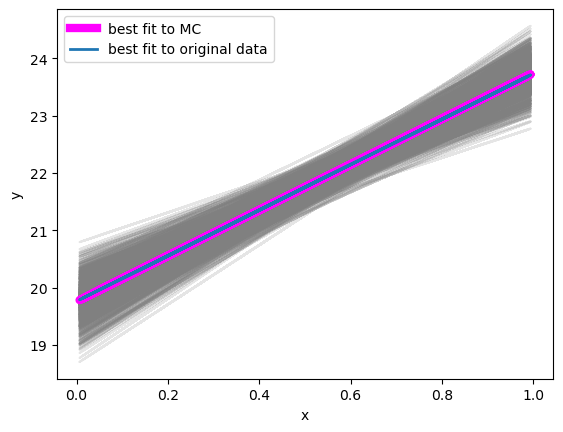

In [14]:
# let's plot all our best fit lines to take a look at them
for i in range(n_sample):
    fit_new = straightline(A_mc[i],B_mc[i],x)
    plt.plot(x,fit_new,c='grey',alpha=0.2)
    
# straight line fit from mean A and B from MC analysis
fit_mc = straightline(mean_A_mc,mean_B_mc,x)
fit_data = straightline(A,B,x)
# straight line fit from original data

plt.plot(x,fit_mc,lw=6,c='magenta',label='best fit to MC')
plt.plot(x,fit_data,lw=2,label='best fit to original data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

***

## Fitting curves to data 

An easy way to fit curves is via `the scipy` `optimize.curve_fit`. This returns an array with the best fitting parameters for the function it is given, based on minimising the differences in the `func(x,fit parameters)-y` squared.

It also returns an array with the covariance of the fit parameters (see Chapter 4). The diagonals of this array also provides the variance of the parameter estimates.

### <font color=#4290C4>Example</font>

1. Generate some fake data and fit a curve to it using the `scipy` `optimize curvefit` function and an equation of the form $y = A {\rm sin}(bx)+C$. Perturb each $y$ value by adding on some $\Delta y$ to create new "noisy" data.   Obtain errors in $y$ using a random normal distribution with normalisation of 20% of $y$.

2. Derive the reduced chi-square value for your fit.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

<ErrorbarContainer object of 3 artists>

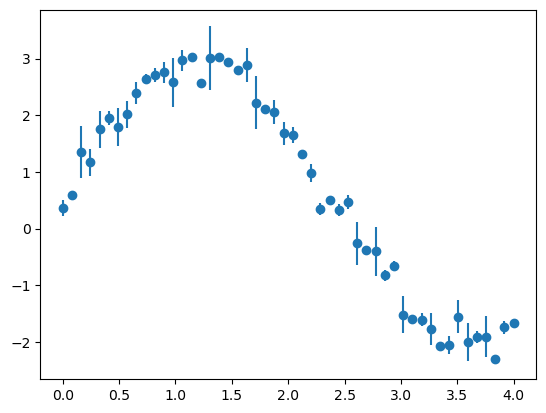

In [15]:
from scipy import optimize
import numpy as np
import pylab as plt 
%matplotlib inline  

# this is a function that we think may explain the data
def test_func(x, a,b,c):
    return a * np.sin(b * x)+c

# generate some fake data
# start off with x array
xdata = np.linspace(0, 4, 50)
# get y from the function above
y = test_func(xdata, 2.5, 1.3, 0.5)

# initialise the random_seed for reproducability
# ie we will get the same initial random seed every time
np.random.seed(1729)
# perturb y by this noise
y_noise = 0.2*np.random.normal(size=xdata.size)
# make new y array that is noisy
ydata = y + y_noise

# set up y error 
y_sigma = 0.2*(0.5+np.random.normal(size=xdata.size))

# plot the data
plt.errorbar(xdata, ydata,yerr=y_sigma,fmt='o',label='data')

Fit parameters A, B and C are 2.485, 1.319 and 0.430

covariance matrix [[ 1.23722500e-04  1.45537330e-05  1.29967869e-05]
 [ 1.45537330e-05  4.12609818e-06 -1.42942807e-08]
 [ 1.29967869e-05 -1.42942807e-08  4.46367627e-05]]


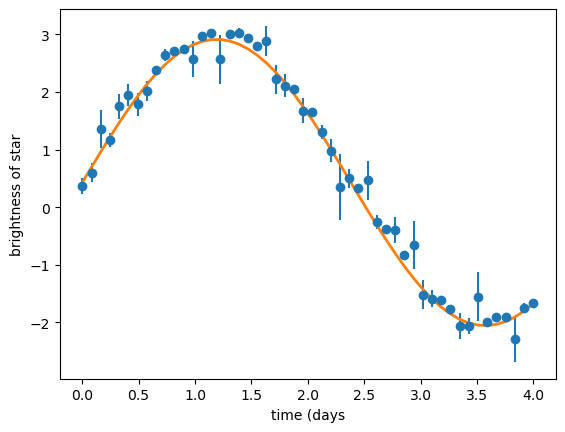

In [16]:
# get scipy to do the fitting for us
# need to include y errors
params, params_covariance = optimize.curve_fit(test_func, xdata, ydata,sigma=y_sigma,absolute_sigma=True)
print('Fit parameters A, B and C are {:.3f}, {:.3f} and {:.3f}'.format(params[0],params[1],params[2]))
print()
print('covariance matrix',params_covariance)

# plot the data
plt.errorbar(xdata, ydata,yerr=y_noise,fmt='o',label='data')
plt.xlabel('time (days')
plt.ylabel('brightness of star')

# plot the fit
plt.plot(xdata,test_func(xdata,params[0],params[1],params[2]),lw=2,label='best fit')

In [17]:
import scipy.stats
# equation to get reduced chi^2
def chi_sq_red(x,y,y_error):
    # number of degrees of freedom
    n = len(x) - 3 #3 parameters already need to be calculated : a, b + c
    result = (1./n)*np.sum(((y-test_func(x,params[0],params[1],params[2]))/y_error)**2.0) 
    return result

# calculate chi^2 of the fit:
print('The reduced chi-squared for the fit is {:.3f}'.format(chi_sq_red(xdata,ydata,y_sigma))) 


The reduced chi-squared for the fit is 6.133


## Approaches for non linear relationships or non-normal errors

The propogation of errors in complex systems can quickly get complicated. Sometimes the error terms are non-linear in the fit parameters, and cannot be analytically solved to give the best fitting model. To get around this we can use two powerful computatonal techniques to deal with this problem, and that can return reliable results - the MCMC and the bootstrap.

###  Using MCMC to derive the best fitting model parameters between model and data

To do this, we **make chi-square the distribution of space we need to sample**.

Here your likelihood is the chi-square function - best to use so-called “log likelihood” given the exponential term can get tricky with computers. The log likelihood for chi-square is given by

> log likelihood $=-0.5\dfrac{\sum{(y-y_{\rm model})}^2}{\sigma^2}$



#### Derivation: the likelihood for a chi-square 

If we have a chi-square distribution with a Gaussian error distribution, the probability of each point for chi-square is written as:

$p(x_i | \alpha) = \dfrac{1} {\sqrt{2\pi} \sigma_i} {\rm exp} \left( - \dfrac{ (x_i - \mu_i(\alpha))^2 }{ 2\sigma_i^2 } \right)$

so we can write the likelihood function as,

$\mathfrak{L}(\alpha) = e^{-\chi^2/2} \times \prod_{i = 1}^N \dfrac{ 1 }{ \sigma_i } \times (2\pi)^{-N/2}.$

We can now take the natural log of this to get,

$-2\,\text{ln}\,\mathfrak{L} = \chi^2 + 2\sum_{i=1}^N\,\text{ln}\,\sigma_i + N\,\text{ln}(2\pi)$.

To maximise $\mathfrak{L}(\alpha)$, we then need to minimise $ \chi^2 + 2\sum_{i=1}^N\,\text{ln}\,\sigma_i $. The maximum likelihood $\alpha_{ML}$ is then the one that satisfies,

$\dfrac{ \partial }{ \partial \alpha } \left[ -2~\text{ln}\,\mathfrak{L}(\alpha) \right]= 0$

and the variance of $\alpha_{ML}$  this given by:

$\text{var}(\alpha_{ML}) \approx  \dfrac{ 2 } { \dfrac{ \partial^2 }{ \partial \alpha^2 } \left[ -2~\text{ln}\,\mathfrak{L}(\alpha) \right]_{\alpha=\alpha_{ML}} }$

If we're only interested in the shape of the distribution to estimate statistics such as the mean value of a parameter, we can ignore the additional terms and therefore 

$-2\,\text{ln}\,\mathfrak{L} = \chi^2$ ie

$\text{ln}\,\mathfrak{L} \propto -0.5\chi^2$.

### Bootstrapping

You want to ask a question from a population but you can’t. You use a sample instead. Previously we took samples from the population using Monte Carlo by assuming a distribution of the sample eg Normal or Binomial. What if you are not happy with assuming a distribution?

So we just sample from the sample instead….it is a part of the population after all, just a small discrete part.
Given a set of N data points, we randomly draw N numbers from this set:

$X=x_1,x_2,x_3,x_4,x_5,x_6,x_7$ 

$X_{\rm new}=x_3,x_6,x_7,x_4,x_5,x_1,x_1$. 

This means that some numbers will be duplicated, and some will be missing entirely (so-called sampling with replacement).  Combining all the bootstrap datasets, we can now get a new estimate of the mean from this new, sampled data set or create N datasets to fit N straight lines or other functions to.

So the steps are:

- Choose a number of bootstrap samples to perform
- Choose a sample size
- For each bootstrap sample
    - Draw a sample with replacement with the chosen size
    - Calculate the statistic on the sample
    - Calculate the mean of the calculated sample statistics,
    
et voila!

### <font color=#4290C4>Example</font>

A population of data is randomly generated using `pop=np.random.randint(0,500, size=1000)`. Let's say this is the number of people getting flu twice in one year in the University.

Generate a subsample of data 300 points by randomly drawing from this population. This is equivalent to mimicking an experiment where someone works out the average number of people getting flu twice in one year by asking 300 people.

- Plot the data and estimate the mean of the population and the mean of the subsample.
- Use the bootstrap method to estimate the mean parameter of the population (the mean number of people getting flu twice in one year) and plot your bootstrap sample.  What do you notice?

###  <font color=#c38241> Solution</font>

Click below to see the solution.

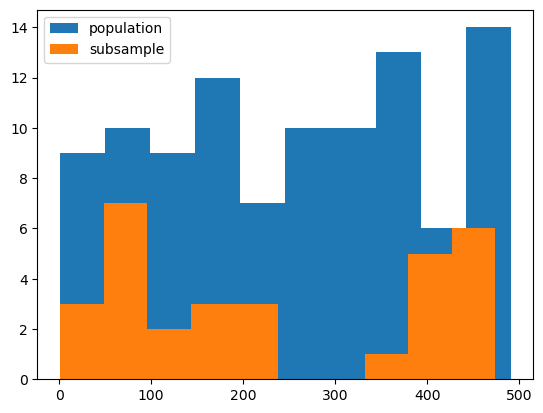

The mean of the population is 252.70

The mean of the subsample is 228.07


In [18]:
import numpy as np

np.random.seed(42)
pop = np.random.randint(0,500 , size=100)

# draw a sample from population
sample = np.random.choice(pop, size=30)

#plt the histograms
plt.hist(pop,label='population')
plt.hist(sample,label='subsample')
plt.legend()
plt.show()

# estimate means
print('The mean of the population is {:.2f}'.format(pop.mean()))
print()
print('The mean of the subsample is {:.2f}'.format(sample.mean()))

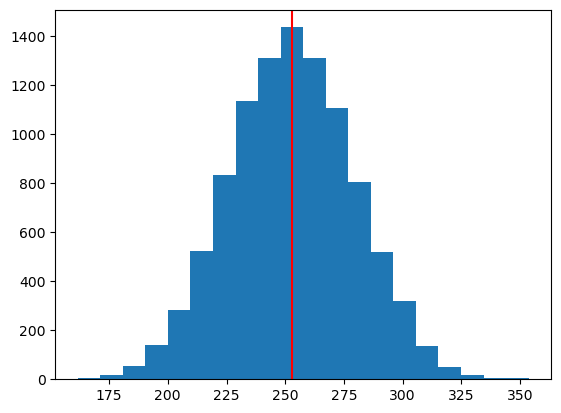

The mean of the bootstrapped sample (ie mean of the means) is 252.83


In [19]:
# make sure we have the same random seed
np.random.seed(42)

# simulated sampling distribution - the bootstrap
sample_props = []
for _ in range(10000):
    sample = np.random.choice(pop, size=30)
    sample_props.append(sample.mean())
    
plt.hist(sample_props,bins=20)
plt.axvline(np.mean(sample_props),c='red')
plt.show()

print('The mean of the bootstrapped sample (ie mean of the means) is {:.2f}'.format(np.mean(sample_props)))

Now the recovered population from the bootstrap looks like a Gaussian and not like the original population which was uniform. This is what we expect however from the Central Limit Theorem in Chapter 3:

> When independent random variables are added, their sum tends toward a normal distribution for large N even if the original variables themselves are not normally distributed.

The mean of the bootstrap sample is much closer to the mean of the original population indicating that the bootstrap technique is really powerful even when we dont know the original distribution. It also shows how far off the mean of the subsample of 100 people we used for our experiment is from the original population - clearly the subsample was not a good reflection of the original data.

***

Now you are ready to tackle the **Chapter 8 quiz** on Learning Central and the [Chapter 8 yourturn notebook](https://github.com/haleygomez/Data-Science-2025/blob/main/blended_exercises/Chapter8/Chapter8_yourturn.ipynb).